<a href="https://colab.research.google.com/github/BlackZhc/ML_proj/blob/main/Project3_Haochi_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
# This snipped of code will download the data file
!wget https://www.dropbox.com/s/ms5p2hqqhlaago7/replay_buffer.npy?dl=1
!mv replay_buffer.npy?dl=1 replay_buffer.npy

In [ ]:
Project3 Haochi Zhang

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [ ]:


γ = 0.95
batch_size = 128

replay_buffer = np.load('replay_buffer.npy')

model = Sequential([Dense(50,'relu'), Dense(1)])
model.compile(loss='mse')

In [ ]:
# This function will select a random sample of the replay buffer.
def sample_from_buffer():
    idx = np.random.choice(len(replay_buffer), size = batch_size) # A vector of random indexes,
    # where the idexes can vary from 0 to len(replay_buffer).
    # The size of the sample is 'batch_size'

    mini_batch = replay_buffer[idx]
    Dt, D_tp1, π_t, π_tp1 = np.split(mini_batch, 4, axis=1)
    R = γ * π_tp1 * D_tp1
    return Dt, R, D_tp1


# This function implements one step of the TD update
def update():
    D, R, D_tp1 = sample_from_buffer() # get a sample from the replay buffer
    V_tp1 = model.predict(D_tp1) # Evaluate the network at y_tp1
    TD_target = R + γ*V_tp1
    model.fit(D, TD_target, verbose=False, batch_size=128)


In [ ]:
import matplotlib.pyplot as plt
for iteration in range(100):
    update()


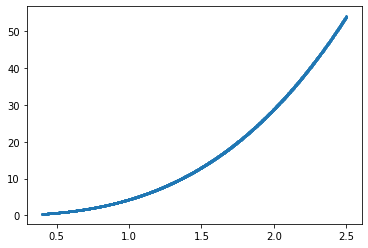

In [ ]:
# Show your results
Dt, D_tp1, π_t, π_tp1 = np.split(replay_buffer, 4, axis=1)
V = model.predict(Dt)
Pt = V / π_t
plt.scatter(Dt, Pt, s=1)
plt.show()
plt.pause(1e-6)
# P.S: you figure should be similar to this one: https://www.dropbox.com/s/6992cmfatiu3wkj/PD.png?dl=0